In [8]:
# Cluster the breast cancer data
# naturally, labels will be ignored
# Cluster for differnt values of clusters, and evaluate
# use:SSE (intertia), silhouette


import numpy as np
from sklearn.cluster import DBSCAN, KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn import mixture




        

# Perfom kmeans clustering, for different nu,ber of clusters
# Evaluate with: inertias, and silhouette
# input:  x,  a data set
# returns:  for each number of clusters, return inertia, silhouette
def kmeansClustering (x):
    inertiasAll=[]
    silhouettesAll=[]
    clustersAll=[]
    maxClusters=32

    for n in range(2,maxClusters):
        #print 'Clustering for n=',n
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(x)
        y_kmeans = kmeans.predict(x)

        #get cluster centers
        kmeans.cluster_centers_

        #evalute
        #print 'inertia=',kmeans.inertia_
        
        silhouette_values = silhouette_samples(x, y_kmeans)
        #print 'silhouette=', np.mean(silhouette_values)
    
        inertiasAll.append(kmeans.inertia_)
        silhouettesAll.append(np.mean(silhouette_values))    
        clustersAll.append(n)
        


    return  clustersAll, silhouettesAll, inertiasAll



import warnings
warnings.filterwarnings("ignore")


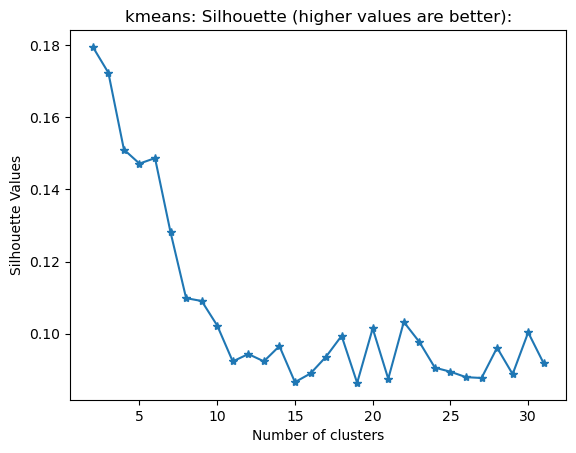

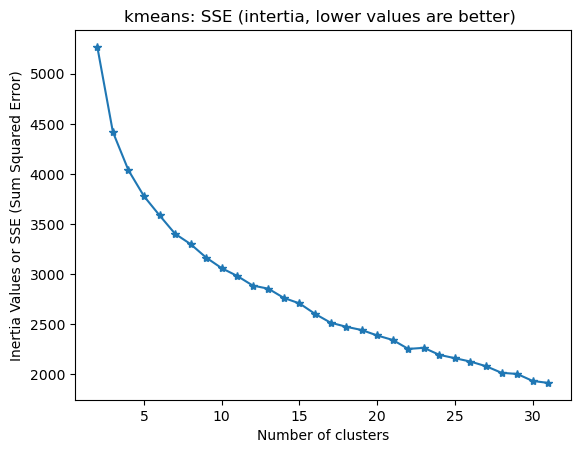

In [9]:
# Read data file: Breast Cancer
data=pd.read_csv('wpbc.data',header=None)


y=data[1]
y.replace('N',0,inplace=True)
y.replace('R',1,inplace=True)


x=data.loc[:,2:]

# the following is a ?
#x[34].loc[196]

#replace it with a numpy nan
x=x.replace('?',np.NaN)

x[34].fillna(x[34].median(),inplace=True)
x1=x.astype(float)
y1=y.astype(int)

# make all columns with 0-mean, and 1-std
x1 = preprocessing.scale(x1)


# #uncomment the next three lines to read: Iris.data
# data=pd.read_csv('iris2.data',header=None)
# x1=data.loc[:,0:3]
# x1 = preprocessing.scale(x1)



# do the clusterings
# labels will be ignored
clustersAll2, silhouette_values2, inertiasAll2 = kmeansClustering(x1)


# data visualizations
plt.figure(1)
plt.title('kmeans: Silhouette (higher values are better):')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Values')
plt.plot(clustersAll2, silhouette_values2,'*-')

plt.figure(2)
plt.title('kmeans: SSE (intertia, lower values are better) ')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Values or SSE (Sum Squared Error)')
plt.plot(clustersAll2, inertiasAll2, '*-')


